<a href="https://colab.research.google.com/github/vasanthi2469/Python-Training/blob/main/PCA%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step -1 **
### Load the dataset

In [ ]:
import pandas as pd
DS = pd.read_csv("/content/ToyotaCorolla.csv")

This reads the CSV file located at file_path into a pandas DataFrame named **DS**

#**Step -2 **
### Get the shape of the dataset

In [ ]:
DS.shape

(1436, 39)

**Summary**

1. **Number of Cars**: 1,436 used cars.
2. **Features**: 39 features describing each car, including:

   * **Numerical**: Price, age (in months), kilometers driven, horsepower, weight.
   * **Categorical**: Car model, fuel type (Petrol, Diesel, CNG), color.
   * **Binary**: Features like power steering, ABS, airbags, CD player.
3. **Data Quality**: Clean dataset with no missing values.
4. **Fuel Type**: Most cars are petrol-powered.
5. **Common Features**: Almost all cars have power steering; many have airbags.
6. **Age Range**: Cars range from 1 to 80 months old.
7. **Kilometers Driven**: Between 1 km and 243,000 km.
8. **Price Range**: ₹4,350 to ₹32,500.
9. **Use Cases**: Suitable for analysis like price prediction, feature comparison, and customer insights.



#**Step -3 **
#Convert into Data types

# Display the first few rows and data types before conversion

In [ ]:
DS.head()

,Id,Model,Price,Age (month),Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [ ]:
DS.dtypes

,0
Id,int64
Model,object
Price,int64
Age (month),int64
Mfg_Month,int64
Mfg_Year,int64
KM,int64
Fuel_Type,object
HP,int64
Met_Color,int64


# Convert string-based columns to categorical

In [ ]:
DS['Model'] = DS['Model'].astype('category')
DS['Fuel_Type'] = DS['Fuel_Type'].astype('category')
DS['Color'] = DS['Color'].astype('category')

**Explanation :**

as type('category') Conversion: For each of the columns (Model, Fuel_Type, and Color), the code converts them from string-based columns to categorical data type.
Why Categorical?
Memory Efficiency: Categorical data types use less memory by storing only the unique values in a column and mapping the rest to these unique values.
Optimized Computation: Many operations like grouping, sorting, and statistical analysis are faster on categorical columns compared to strings.
Improvement in Analysis: Categorical columns are particularly useful in machine learning and data analysis because they can be efficiently encoded into numeric values when needed.

# Convert binary columns to boolean

In [ ]:
binary_columns = [
    'Met_Color', 'Automatic', 'Mfr_Guarantee', 'Dealer_Guarantee',
    'ABS', 'Airbag_1', 'Airbag_2', 'Aircond', 'Automatic_aircond',
    'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows',
    'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
    'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
    'Parking_Assistant', 'Tow_Bar'
]
DS[binary_columns] = DS[binary_columns].astype(bool)

# **Explanation :**

DS[binary_columns]: This accesses all the columns listed in binary_columns from the DS DataFrame.
.astype(bool): This method converts the data type of the selected columns to boolean:
0 becomes False
1 becomes True
DS[binary_columns] = ...: The converted columns are assigned back to their original positions in the DS DataFrame.

**Expected Result:**
The values in these columns will change from:

0 to False

1 to True

This makes the columns more intuitive and easier to work with in further analysis, as boolean values are often preferred in logical operations.

#**Step -4 **

# Check for missing values in the dataset

In [ ]:
missing_values = DS.isnull().sum()

# Filter to only show columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values


,0


**Explanation**  :

There are no missing values in the dataset — every column is fully populated.

#**Step -5 **

#Duplicate Values

In [ ]:
# Find duplicate rows
duplicates = DS[DS.duplicated()]

# Display the first few duplicate rows (if any)
duplicates.head()

,Id,Model,Price,Age (month),Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar



**Explanation :**

 dataset does not contain any completely duplicated rows — every row in the file is unique when considering all columns together.



#**Step -6 **

#Fill missing values

**Explanation** :


 Every column is completely filled — No cell is empty, no NaN or NULL value is present.

No cleaning or imputation needed (like filling with mean, median, or mode).

#**Step -7 **

#Data Visualization

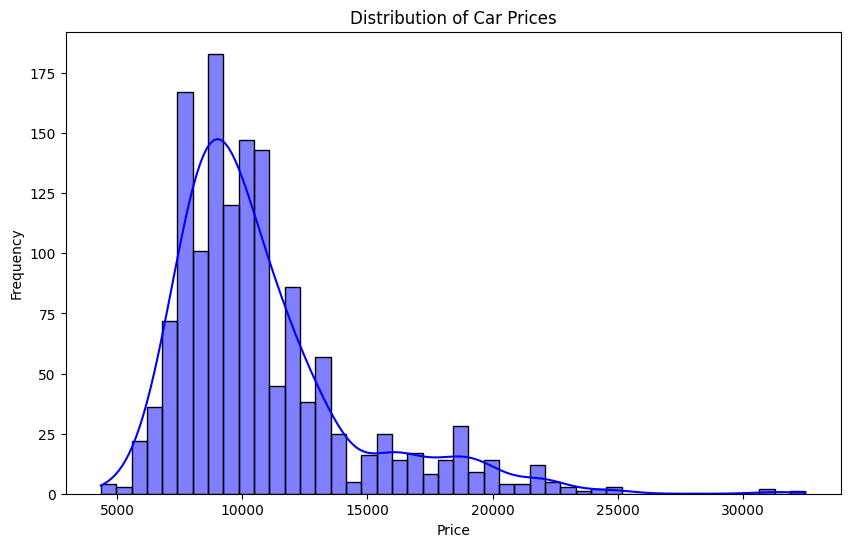

In [ ]:
# Install libraries if you haven't already (uncomment the lines below)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---- Visualization 1: Distribution of Car Prices ----
plt.figure(figsize=(10,6))
sns.histplot(DS['Price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram to visualize the distribution of car prices in a dataset (`DS`).
1. **Importing Libraries:**

   * `pandas`: Used for handling data in tabular form.
   * `matplotlib.pyplot`: Used for creating static visualizations like charts.
   * `seaborn`: A statistical visualization library built on top of Matplotlib, which makes it easier to create visually appealing charts.

2. **Plotting the Distribution:**

   * `plt.figure(figsize=(10,6))`: Sets the size of the figure (chart).
   * `sns.histplot(DS['Price'], kde=True, color='blue')`: This line creates the histogram.

     * `DS['Price']`: Refers to the column in the dataset containing car prices.
     * `kde=True`: Adds a Kernel Density Estimate (smooth line) over the histogram, which helps in understanding the distribution of the data.
     * `color='blue'`: Sets the color of the histogram to blue.

3. **Title and Labels:**

   * `plt.title('Distribution of Car Prices')`: Adds a title to the chart.
   * `plt.xlabel('Price')`: Labels the x-axis as "Price."
   * `plt.ylabel('Frequency')`: Labels the y-axis as "Frequency," which indicates how often each price range appears in the data.

4. **Displaying the Plot:**

   * `plt.show()`: Displays the chart.

### Simple Explanation:

The code is showing how car prices are distributed in the dataset. It uses a histogram with a smooth curve over it to show the frequency of different price ranges. You can visually assess if prices are concentrated in certain ranges, if there's a peak at specific values, or if they are spread out.


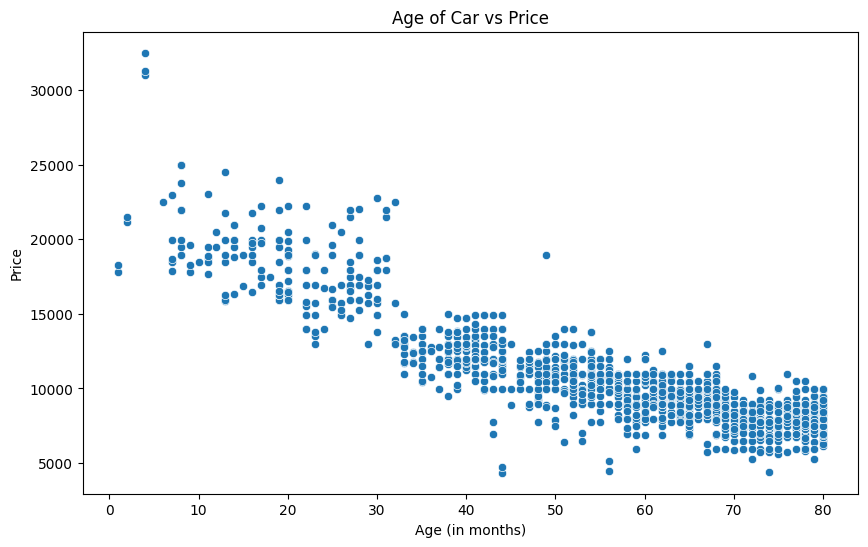

In [ ]:
# ---- Visualization 2: Age vs Price (Scatter Plot) ----
plt.figure(figsize=(10,6))
# The column name was changed from 'Age_in_months' to 'Age'
sns.scatterplot(data=DS, x='Age (month)', y='Price')
plt.title('Age of Car vs Price')
plt.xlabel('Age (in months)')
plt.ylabel('Price')
plt.show()

This code creates a scatter plot to visualize the relationship between the age of a car (in months) and its price.

1. **Setting the Figure Size:**

   * `plt.figure(figsize=(10,6))`: This sets the size of the chart to 10 inches by 6 inches.

2. **Creating the Scatter Plot:**

   * `sns.scatterplot(data=DS, x='Age (month)', y='Price')`: This creates the scatter plot.

     * `data=DS`: Specifies the dataset (`DS`).
     * `x='Age (month)'`: The x-axis represents the age of the car in months.
     * `y='Price'`: The y-axis represents the car's price.

3. **Adding Title and Labels:**

   * `plt.title('Age of Car vs Price')`: This adds the title "Age of Car vs Price" to the chart.
   * `plt.xlabel('Age (in months)')`: This labels the x-axis as "Age (in months)".
   * `plt.ylabel('Price')`: This labels the y-axis as "Price".

4. **Displaying the Plot:**

   * `plt.show()`: Displays the scatter plot.

### Simple Explanation:

This code creates a scatter plot to show how the price of a car changes with its age. Each point on the plot represents a car, where the position on the x-axis shows the car's age (in months), and the position on the y-axis shows its price. By looking at the scatter plot, you can analyze if there’s any noticeable trend, such as whether older cars tend to have lower prices.


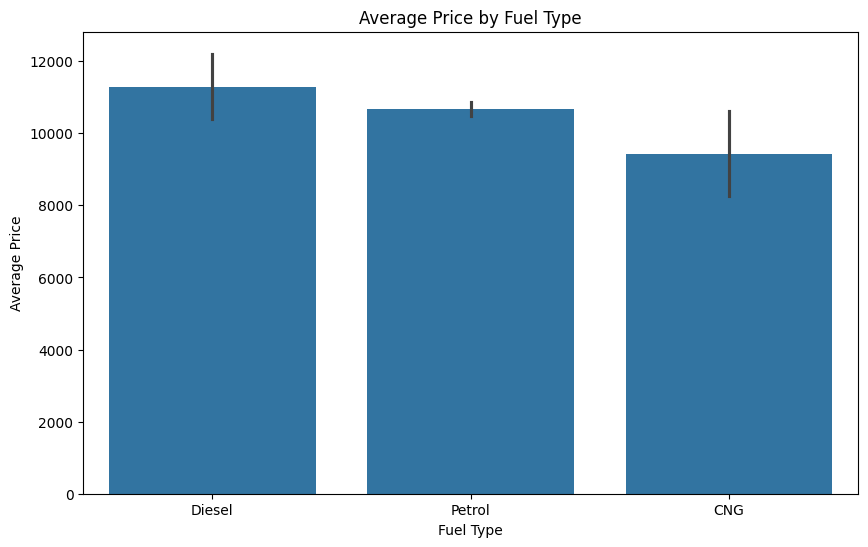

In [ ]:
# ---- Visualization 3: Fuel Type vs Average Price (Bar Plot) ----
plt.figure(figsize=(10,6))
sns.barplot(x='Fuel_Type', y='Price', data=DS)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

This code creates a bar plot to show the average car price for each fuel type.

1. **Setting the Figure Size:**

   * `plt.figure(figsize=(10,6))`: Sets the size of the plot to 10 inches by 6 inches.

2. **Creating the Bar Plot:**

   * `sns.barplot(x='Fuel_Type', y='Price', data=DS)`: This creates a bar plot.

     * `x='Fuel_Type'`: The x-axis shows different fuel types (e.g., petrol, diesel, etc.).
     * `y='Price'`: The y-axis shows the average price of cars.
     * `data=DS`: Specifies the dataset (`DS`).

   The `sns.barplot` function automatically calculates and plots the average price for each fuel type.

3. **Adding Title and Labels:**

   * `plt.title('Average Price by Fuel Type')`: This adds the title "Average Price by Fuel Type" to the plot.
   * `plt.xlabel('Fuel Type')`: This labels the x-axis as "Fuel Type."
   * `plt.ylabel('Average Price')`: This labels the y-axis as "Average Price."

4. **Displaying the Plot:**

   * `plt.show()`: Displays the bar plot.

### Simple Explanation:

This code creates a bar plot to compare the average price of cars based on their fuel type. Each bar represents a different fuel type (such as petrol or diesel), and the height of the bar represents the average price for that fuel type. By looking at this plot, you can quickly see which fuel type tends to have higher or lower average prices.


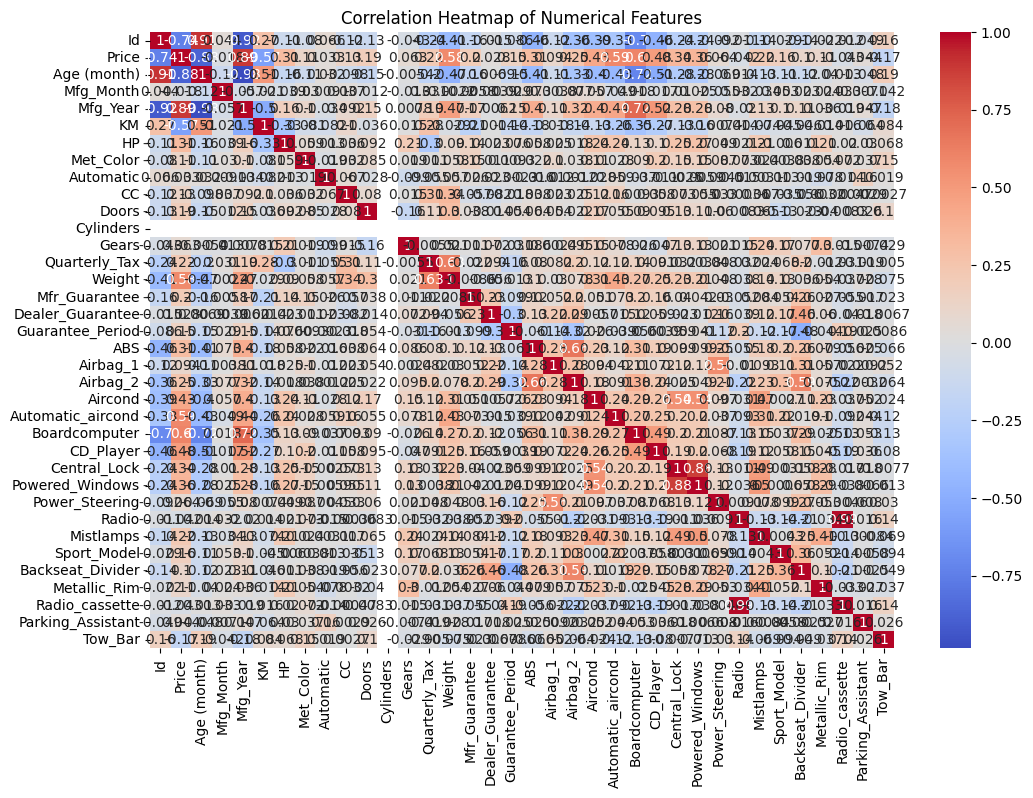

In [ ]:
# ---- Visualization 4: Correlation Heatmap ----
plt.figure(figsize=(12,8))
correlation_matrix = DS.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

This code creates a correlation heatmap to visualize the relationships between numerical features in the dataset.

1. **Setting the Figure Size:**

   * `plt.figure(figsize=(12,8))`: This sets the size of the heatmap plot to 12 inches by 8 inches.

2. **Calculating the Correlation Matrix:**

   * `correlation_matrix = DS.corr(numeric_only=True)`: This calculates the correlation matrix for all numerical features in the dataset (`DS`).

     * The `.corr()` function computes the pairwise correlation coefficients between numerical columns in the dataset.
     * `numeric_only=True` ensures that only numerical columns are included in the correlation matrix.

3. **Creating the Heatmap:**

   * `sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')`: This creates the heatmap.

     * `correlation_matrix`: The data being visualized, which contains the correlation values between numerical features.
     * `annot=True`: This adds the correlation values as annotations (numbers) inside the heatmap cells.
     * `cmap='coolwarm'`: This specifies the color palette for the heatmap, ranging from cool (blue) to warm (red) colors. High positive correlations are shown in red, and low or negative correlations in blue.

4. **Adding the Title:**

   * `plt.title('Correlation Heatmap of Numerical Features')`: This adds the title "Correlation Heatmap of Numerical Features."

5. **Displaying the Plot:**

   * `plt.show()`: Displays the heatmap.

### Simple Explanation:

This code generates a heatmap to show how the numerical features in the dataset are correlated with each other. The heatmap uses colors to represent the strength of these correlations, with red indicating strong positive correlations and blue showing weak or negative correlations. The annotated numbers inside each cell show the actual correlation values. This helps in understanding relationships between variables, such as whether price correlates with age or fuel type, for example.


# 2. Principal Component Analysis:  

**a. Identify the categorical variables.**

In [ ]:

# Identify categorical variables
categorical_vars = DS.select_dtypes(include=['object']).columns.tolist()

print("Categorical variables in the dataset are:", categorical_vars)


Categorical variables in the dataset are: ['Model', 'Fuel_Type', 'Color']


**Explanation :**

Identifying categorical variables:
df.select_dtypes(include=['object']): This part of the code selects columns from the DataFrame df that have the data type object. In pandas, columns with data type object typically contain strings and are considered categorical variables.
.columns: This retrieves the column names of the selected columns.
.tolist(): This converts the column names from an Index object to a regular Python list.

Printing the result: This line prints out the list of categorical variables identified in the dataset.

This code will help you identify which columns in your dataset contain categorical data, which is useful for various data analysis and preprocessing tasks.

**b. Explain the relationship between a categorical variable and the series of binary dummy variables derived from it.**

**Explanation**

A categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, representing different categories or groups. For example, the Fuel_Type variable in the ToyotaCorolla.csv dataset can have values like Petrol, Diesel, and CNG.

Dummy variables (also known as indicator variables) are binary variables created to represent the categories of a categorical variable. Each category is represented by a separate dummy variable that takes the value 1 if the observation belongs to that category and 0 otherwise. This transformation is useful for statistical modeling and machine learning algorithms that require numerical input.

**c.How many dummy binary variables are required to capture the information in a categorical variable with N categories**



**Explanation**

When creating dummy variables, one category is typically omitted to avoid multicollinearity, which occurs when two or more variables are highly correlated. This is known as the dummy variable trap. By omitting one category, you ensure that the dummy variables are independent of each other.

Example

If you have a categorical variable Fuel_Type with 3 categories: Petrol, Diesel, and CNG, you would create 2 dummy variables:

Fuel_Type_Petrol

Fuel_Type_Diesel

The omitted category (CNG) can be inferred when both dummy variables are 0.

**d.Use R to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, the values in the derived binary dummies**

In [ ]:
# Select categorical columns
categorical_cols = ['Fuel_Type', 'Color', 'Model']  # Add other categorical columns if needed

# Create dummy variables using pandas' get_dummies
DS_with_dummies = pd.get_dummies(DS, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first few rows of the DataFrame with dummy variables
print(DS_with_dummies.head())

   Id  Price  Age (month)  Mfg_Month  Mfg_Year     KM  HP  Met_Color  \
0   1  13500           23         10      2002  46986  90          1   
1   2  13750           23         10      2002  72937  90          1   
2   3  13950           24          9      2002  41711  90          1   
3   4  14950           26          7      2002  48000  90          0   
4   5  13750           30          3      2002  38500  90          0   

   Automatic    CC  ...  \
0          0  2000  ...   
1          0  2000  ...   
2          0  2000  ...   
3          0  2000  ...   
4          0  2000  ...   

   Model_TOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 2/3-Doors  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   Model_TOYO

**Explanation:**

Import pandas: import pandas as pd imports the necessary library for data manipulation.
Select Categorical Columns: categorical_cols = ['Fuel_Type', 'Color', 'Model'] defines a list containing the names of the categorical columns in your DataFrame (DS). You should modify this list to include all relevant categorical columns.
Create Dummy Variables: DS_with_dummies = pd.get_dummies(DS, columns=categorical_cols, drop_first=True, dtype=int) uses the pd.get_dummies function to create dummy variables.
DS: Your original DataFrame.

columns=categorical_cols: Specifies the columns to convert into dummies.

drop_first=True: Drops the first dummy variable for each categorical column to avoid multicollinearity (the dummy variable trap).

dtype=int: Sets the data type of the dummy variables to integers (0 or 1).

Display DataFrame:

print(DS_with_dummies.head()) prints the first few rows of the DataFrame with the newly created dummy variables.

Interpretation for One Record:

Let's consider a single record (row) in the dataset after dummy variable creation. Suppose the record has the following values for the original categorical columns:

Fuel_Type: 'Petrol'

Color: 'Blue'

Model: 'Corolla'

After creating dummy variables, you'll have new columns in your DataFrame, and for this specific record:

Fuel_Type_Diesel: 0 (because Fuel_Type is 'Petrol', not 'Diesel')

Fuel_Type_CNG: 0 (because Fuel_Type is 'Petrol', not 'CNG')

Color_Blue: 1 (because Color is 'Blue')

Color_Green: 0 (because Color is not 'Green')

Color_Red: 0 (because Color is not 'Red')

Model_Corolla: 1 (because Model is 'Corolla')

Model_OtherModel: 0 (because Model is not 'OtherModel')

In essence, each dummy variable represents a specific category within a categorical feature. For a given record, the dummy variable is set to 1 if the record belongs to that category and 0 otherwise. This allows you to use these binary variables in regression models or other machine learning algorithms that work with numerical data.

**e. Use R to produce a correlation matrix and matrix plot. Comment on the relationships among variables.**

Index(['Id', 'Price', 'Age (month)', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP',
       'Met_Color', 'Automatic', 'CC',
       ...
       'Model_TOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 2/3-Doors',
       'Model_TOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 4/5-Doors',
       'Model_TOYOTA Corolla LIFTBACK 1.9 D Linea Terra 4/5-Doors',
       'Model_TOYOTA Corolla Liftback 1.6 VVTI 4/5-Doors',
       'Model_TOYOTA Corolla Linea Luna 1.6i 16V 2/3-Doors',
       'Model_TOYOTA Corolla Luna 5drs D4D116 PK 4/5-Doors',
       'Model_TOYOTA Corolla Sw 20D Linea Terra Stationwagen',
       'Model_TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV',
       'Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV',
       'Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV'],
      dtype='object', length=365)


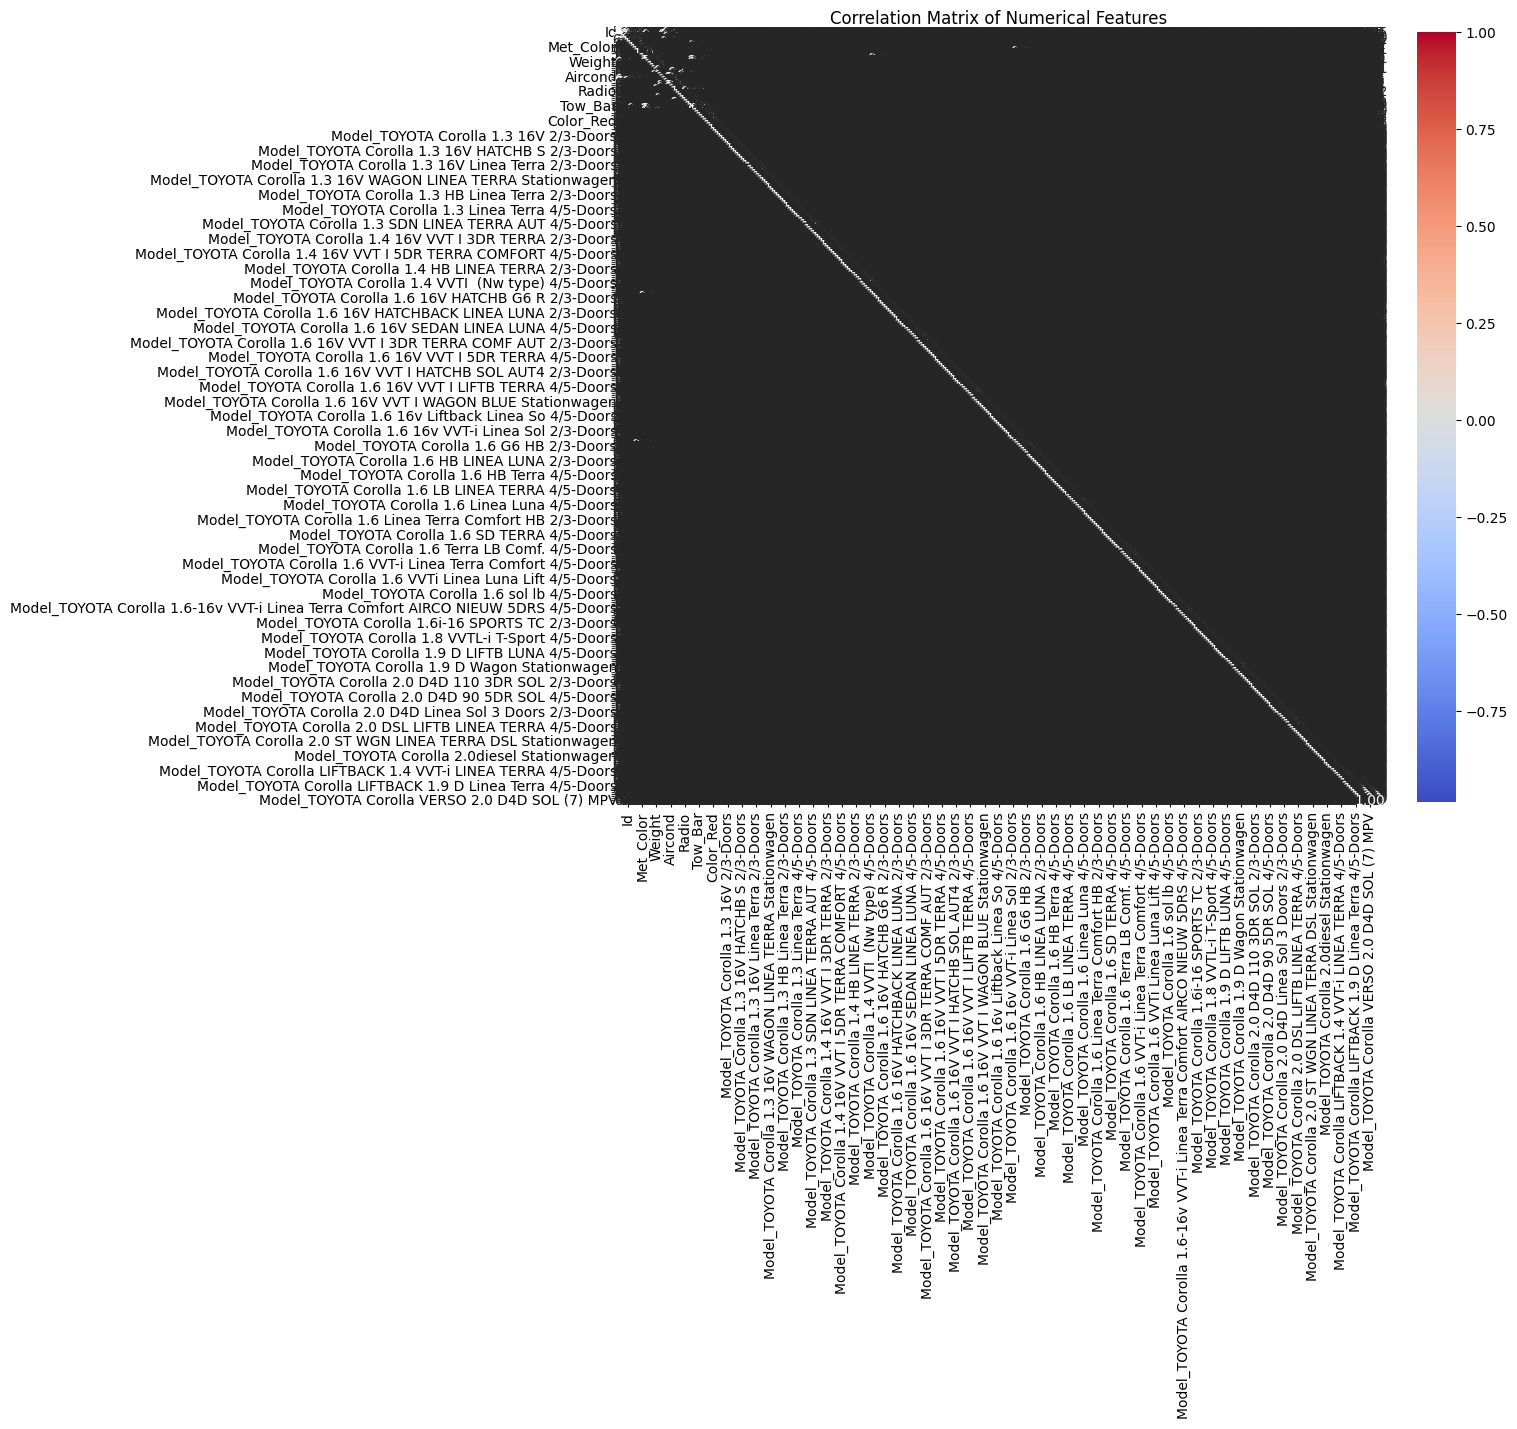

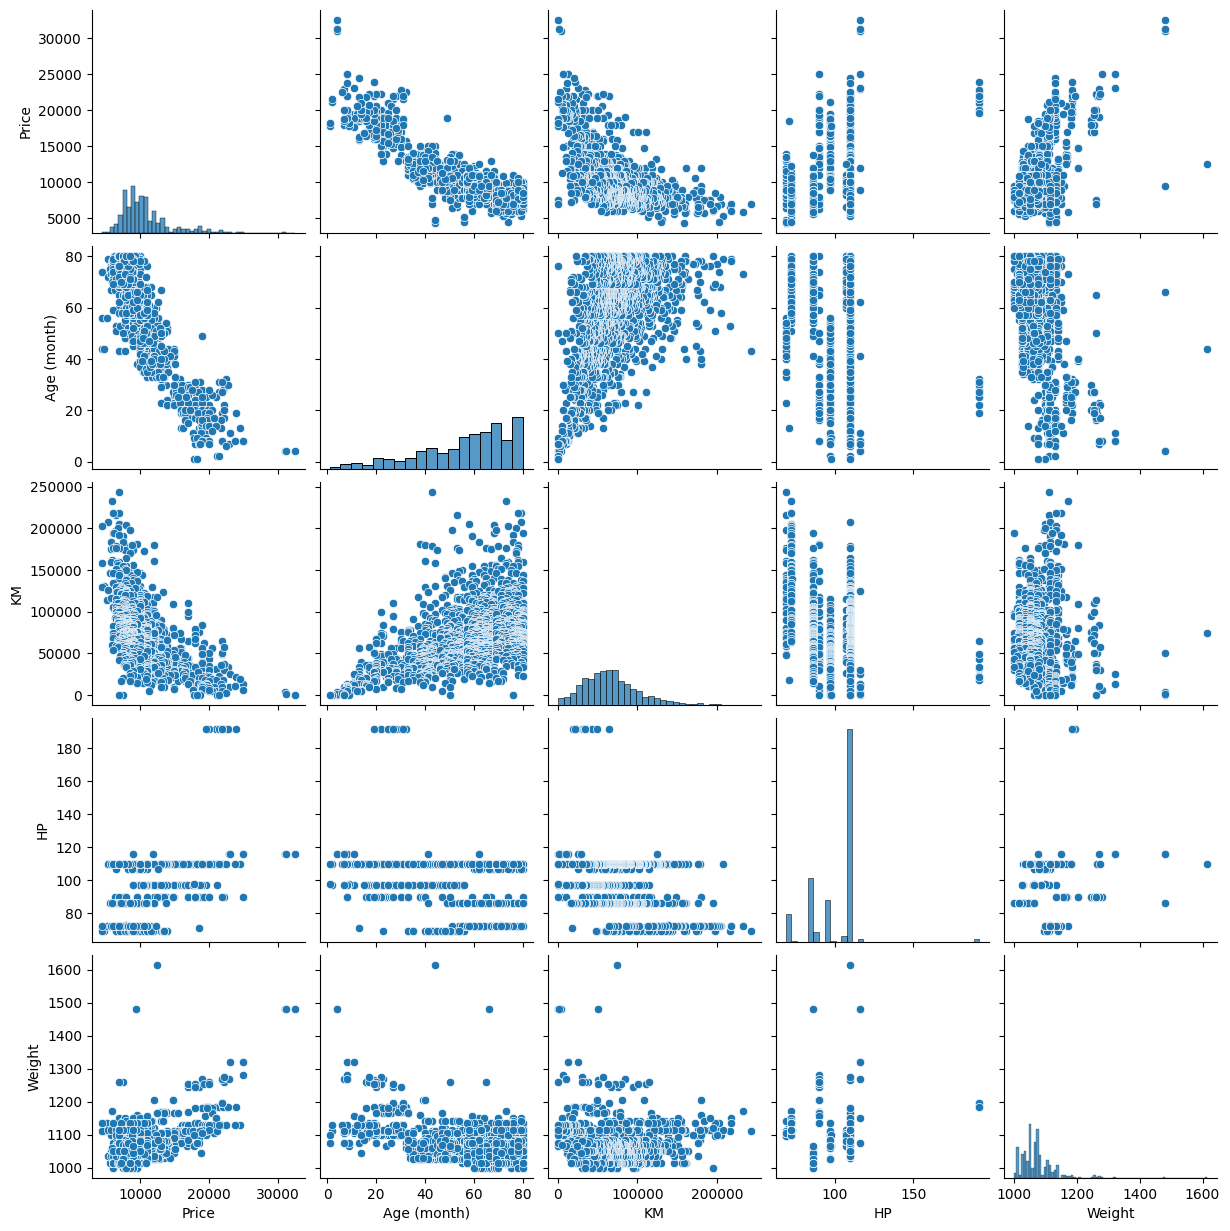

In [ ]:
# Assuming 'Price' is your target variable and other numerical features are predictors
# 'Fuel_Type' has been removed and replaced with its dummy variable representations
# Check the columns in DS_with_dummies to ensure Fuel_Type_CNG exists
print(DS_with_dummies.columns)  # Print columns to identify available dummy variables

# Proceed with feature selection based on available columns
# If 'Fuel_Type_CNG' is not present, exclude it from the feature list
X = DS_with_dummies[['Age (month)', 'KM', 'HP', 'Fuel_Type_Diesel', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
y = DS_with_dummies['Age (month)']

from sklearn.linear_model import LinearRegression # Importing Linear Regression model

model = LinearRegression()
model.fit(X, y)
correlation_matrix = DS_with_dummies.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
sns.pairplot(DS_with_dummies[['Price', 'Age (month)', 'KM', 'HP', 'Weight']])
plt.show()

**Explanation** :

Correlation Matrix (Heatmap):

The heatmap provides a visual representation of the correlation coefficients between pairs of variables. Positive correlations (closer to 1) are shown in warm colors (red), while negative correlations (closer to -1) are shown in cool colors (blue). Values close to 0 indicate weak or no correlation.

Matrix Plot (Pair Plot):

 The pair plot shows scatter plots for each pair of selected variables, along with histograms for individual variables on the diagonal. It helps visualize the relationships and distributions of the variables.

Regression Model Coefficients:

 The coefficients of the Linear Regression model can further help you understand the relationships. For example, a positive coefficient for 'Age (month)' would indicate that as the age of the car increases, the price tends to decrease (negative relationship).

Example Interpretation:

In the heatmap, if you observe a strong negative correlation between 'Age (month)' and 'Price' (e.g., -0.85), it suggests that as the age of the car increases, its price tends to decrease.
In the pair plot, you can visually see the scatter plot between 'Age (month)' and 'Price' to confirm this negative relationship.


If the coefficient for 'Age (month)' in your regression model is negative, it provides further support for this interpretation.